In [4]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook

with open('C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\contour_mask.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Convert to Python script
exporter = PythonExporter()
script, _ = exporter.from_notebook_node(nb)

# Save to .py file
with open('C:\\Users\\fnisha\\Box\\AB-Cook-Nisha Research\\image_analysis_ovary\\contour_mask.py', 'w') as f:
    f.write(script)

In [ ]:
# Loading libraries
import random                        # Library to generate random numbers
import skimage                       # Library for image manipulation
import numpy as np                   # Library for array manipulation
import urllib.request                # Library to download data
import matplotlib.pyplot as plt      # Library used for plotting
from skimage import io, measure               # Module from skimage
from skimage.io import imread        # Module from skimage to read images as numpy arrays
from skimage.filters import gaussian # Module working with a gaussian filter
import pathlib                              # Library to work with file paths
import os
%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from skimage.morphology import binary_dilation
from skimage.segmentation import watershed
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from skimage.segmentation import watershed    # Watershed algorithm
from skimage.filters import difference_of_gaussians


KeyboardInterrupt



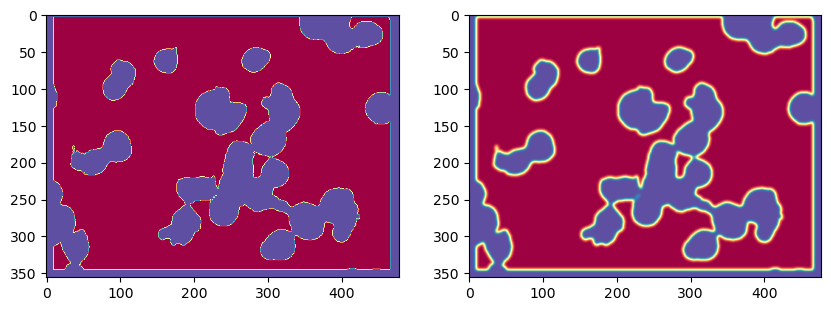

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
# from scipy.ndimage import gaussian
from skimage.io import imread, imsave
from ipywidgets import interactive, widgets, HBox, VBox, Layout
from IPython.display import display
import cv2


# Thresholding the image
def viewer(image, threshold, sigma=2):
    mask_image = np.zeros(image.shape[:2], dtype=np.uint8)
    mask_image[image[:, :, 2] > threshold] = 255  # Thresholding the red channel
    new_mask = gaussian(mask_image.astype(float), sigma=sigma)
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(mask_image, cmap='Spectral')
    ax[1].imshow(new_mask, cmap='Spectral')
    plt.show()
    return new_mask


def interect(image,threshold):
    def wrapped_viewer(threshold, sigma=2):
        return viewer(image, threshold, sigma)

    interactive_plot = interactive(
        wrapped_viewer,
        threshold=widgets.IntSlider(min=0, max=255, step=1, value=145, description='threshold'),
        sigma=widgets.IntSlider(min=0, max=10, step=1, value=2, description='sigma')
    )

    controls = HBox(interactive_plot.children[:-1], layout=Layout(flex_flow='row wrap'))
    output = interactive_plot.children[-1]

    # Display the controls and output as an interactive widget
    # display(VBox([controls, output]))

    # Generate the mask from the interactive result
    return wrapped_viewer(threshold, sigma=2)  # Default values; can be adjusted interactively







def create_mask(img1, new_mask):
    # Check if the image was loaded correctly
    if img1 is None:
        raise ValueError("Image not found or unable to load.")

    # Extract the blue, green, and red channels
    blue_channel1 = img1[:, :, 2]
    green_channel1 = img1[:, :, 1]
    red_channel1 = img1[:, :, 0]

    # Ensure new_mask is a binary, single-channel uint8 mask matching red channel's shape
    if new_mask.dtype != np.uint8:
        new_mask = ((new_mask > 0).astype(np.uint8)) * 255

    # Ensure mask and red channel have the same shape
    assert new_mask.shape == red_channel1.shape, "Mask and red channel must have the same dimensions."

    # Filter the red channel with the mask (keep only overlapping regions)
    filtered_red_channel1 = red_channel1 * (new_mask // 255)
    
    # Combine the filtered red channel with the original green and blue channels
    filtered_image = np.stack([filtered_red_channel1, green_channel1, blue_channel1], axis=-1)
# Overlay the mask on the original image
    overlay_image = img1.copy()
    overlay_image[:, :, 0] = np.maximum(overlay_image[:, :, 0], new_mask)  # Highlight mask on the red channel

    # Display the results
    fig, ax = plt.subplots(1, 4, figsize=(20, 6))
    ax[0].imshow(img1)  # Display the original image
    ax[0].set_title('Original Image')

    ax[1].imshow(new_mask, cmap='gray')  # Display the binary mask
    ax[1].set_title('Mask (new_mask)')

    ax[2].imshow(overlay_image)  # Display the original image with mask overlaid
    ax[2].set_title('Overlay: Mask on Original')

    ax[3].imshow(filtered_image)  # Display the final filtered image
    ax[3].set_title('Filtered Image with Mask')

    for a in ax:
        a.axis('off')

    plt.show()

    return filtered_image



# Load the original image
# original_image1 = imread('original_image.png')

# Generate the mask using the interactive tool
# new_mask = interect(original_image1,120)

# Apply the mask to remove red points outside the mask
# create_mask(original_image1, new_mask)
